In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('targetfinal_niwe.csv')
df.head()

,Unnamed: 0,time,longitude,latitude,u100,v100,winddirection_100m,windspeed_100m,Timestamp
0,0,1940-01-01 00:00:00,80.2,12.94,-5.574465,-5.402843,45.885834,7.763077,1940-01-01 05:30:00
1,1,1940-01-01 01:00:00,80.2,12.94,-5.126173,-5.369360,43.662630,7.423454,1940-01-01 06:30:00
2,2,1940-01-01 02:00:00,80.2,12.94,-4.907752,-5.137853,43.677795,7.105179,1940-01-01 07:30:00
3,3,1940-01-01 03:00:00,80.2,12.94,-5.363307,-4.944612,47.316240,7.294809,1940-01-01 08:30:00
4,4,1940-01-01 04:00:00,80.2,12.94,-5.965220,-5.095123,49.488480,7.845007,1940-01-01 09:30:00


In [3]:
df1 = df[['time', 'windspeed_100m']]
df1.head(24)

,time,windspeed_100m
0,1940-01-01 00:00:00,7.763077
1,1940-01-01 01:00:00,7.423454
2,1940-01-01 02:00:00,7.105179
3,1940-01-01 03:00:00,7.294809
4,1940-01-01 04:00:00,7.845007
5,1940-01-01 05:00:00,7.836477
6,1940-01-01 06:00:00,7.750330
7,1940-01-01 07:00:00,7.610577
8,1940-01-01 08:00:00,7.445908
9,1940-01-01 09:00:00,7.322507


In [4]:
df1.loc[:, 'time'] = pd.to_datetime(df['time'])
df1.head(24)

,time,windspeed_100m
0,1940-01-01 00:00:00,7.763077
1,1940-01-01 01:00:00,7.423454
2,1940-01-01 02:00:00,7.105179
3,1940-01-01 03:00:00,7.294809
4,1940-01-01 04:00:00,7.845007
5,1940-01-01 05:00:00,7.836477
6,1940-01-01 06:00:00,7.750330
7,1940-01-01 07:00:00,7.610577
8,1940-01-01 08:00:00,7.445908
9,1940-01-01 09:00:00,7.322507


In [5]:
df1.set_index( 'time', inplace = True )
df1.head(24)

,windspeed_100m
time,
1940-01-01 00:00:00,7.763077
1940-01-01 01:00:00,7.423454
1940-01-01 02:00:00,7.105179
1940-01-01 03:00:00,7.294809
1940-01-01 04:00:00,7.845007
1940-01-01 05:00:00,7.836477
1940-01-01 06:00:00,7.750330
1940-01-01 07:00:00,7.610577
1940-01-01 08:00:00,7.445908


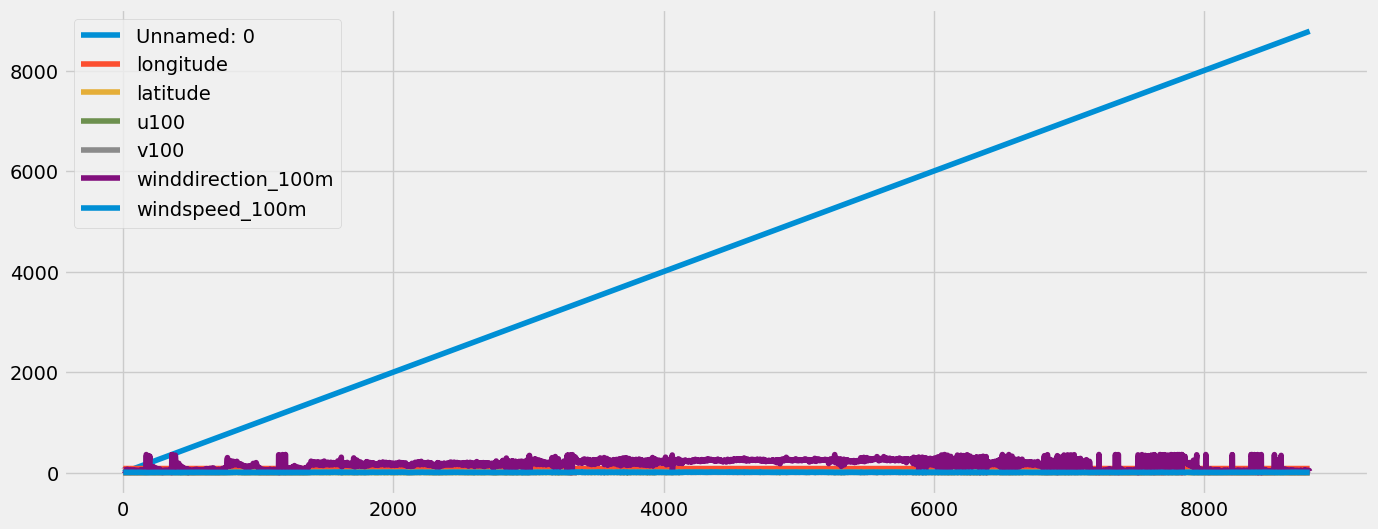

In [6]:
df.plot(figsize=(15,6))
plt.show()

1. **Import Library:** The code imports the `itertools` library.

2. **Set Parameters Range:** Defines ranges (0 to 1) for non-seasonal ARIMA orders (p, d, q).

3. **Generate Combinations:** Utilizes `itertools.product` to generate all possible combinations of p, d, and q.

4. **Create Seasonal Combinations:** Extends combinations to include a seasonal order of 12, creating `seasonal_pdq`.

5. **Print Examples:** Displays examples of parameter combinations for seasonal ARIMA models using the generated combinations.

In [7]:
import itertools

p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Examples of parameter combinations for seasonal ARIMA...')
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for seasonal ARIMA...
SARIMAX: (0, 0, 1) X (0, 0, 1, 12)
SARIMAX: (0, 0, 1) X (0, 1, 0, 12)
SARIMAX: (0, 1, 0) X (0, 1, 1, 12)
SARIMAX: (0, 1, 0) X (1, 0, 0, 12)


In [8]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [9]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

1. **Iteration through Combinations:** The code iterates through each combination of p, d, q stored in the `pdq` list.

2. **Model Creation:** For each combination, it attempts to create a SARIMAX model using `sm.tsa.statespace.SARIMAX` with the specified non-seasonal and seasonal orders.

3. **Model Fitting:** The code fits the model to the time series data (`df1`) and calculates the Akaike Information Criterion (AIC) as a measure of model goodness.

4. **Print Results:** Prints the AIC along with the corresponding parameter combination in the format `ARIMA{param}x{seasonal_pdq} - AIC: {results.aic}`.

5. **Exception Handling:** If there is an exception during the model creation or fitting, it continues to the next iteration without stopping the loop.

In [10]:
for param in pdq:
    try:
        model = sm.tsa.statespace.SARIMAX(df1, order=param, seasonal_order=seasonal_pdq, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit()
        print(f'ARIMA{param}x{seasonal_pdq} - AIC: {results.aic}')
    except Exception as e:
        continue

1. **Model Specification:** Defines a SARIMAX model (`Best_model`) with non-seasonal order (1, 0, 1) and a seasonal order (0, 1, 1, 12).

2. **Model Fitting:** Fits the SARIMAX model to the time series data (`df1`) using the specified parameters.

3. **Summary Print:** Prints the summary table of the fitted model using `results.summary().tables[1]`, providing information on model statistics and parameters.

In [11]:
Best_model = sm.tsa.statespace.SARIMAX(df1, order=(1, 0, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)

results = Best_model.fit()

print(results.summary().tables[1])

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9068      0.004    231.205      0.000       0.899       0.914
ma.L1          0.4718      0.007     68.822      0.000       0.458       0.485
ma.S.L12      -0.9396      0.003   -290.447      0.000      -0.946      -0.933
sigma2         0.2456      0.002    105.059      0.000       0.241       0.250


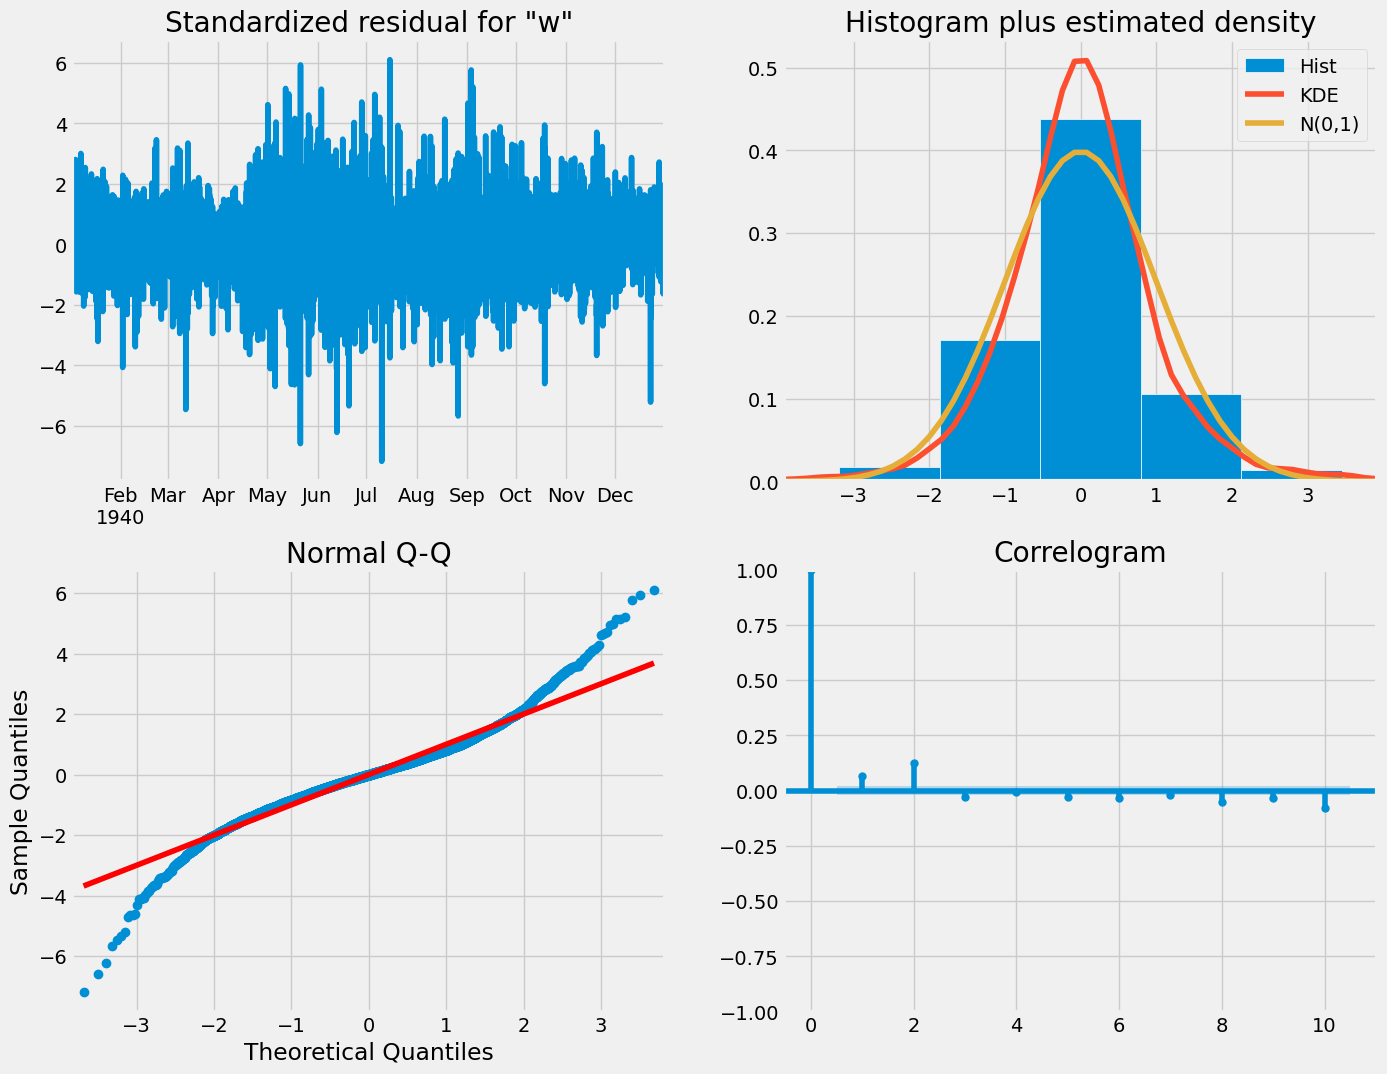

In [12]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

1. **Prediction Generation:**
   - Uses the fitted SARIMAX model (`results`) to generate predictions starting from the specified date ('1940-12-22 00:00:00').
   - The predictions are computed without using any dynamic forecasting.

2. **Confidence Interval Calculation:**
   - Computes the confidence interval (`pred_ci`) for the generated predictions.

3. **Display Confidence Interval:**
   - Prints or displays the calculated confidence interval (`pred_ci`). This interval provides a range within which the true values of the time series are likely to fall.

In [13]:
pred = results.get_prediction(start=pd.to_datetime('1940-12-22 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower windspeed_100m,upper windspeed_100m
1940-12-22 00:00:00,0.732948,2.675565
1940-12-22 01:00:00,0.499920,2.442537
1940-12-22 02:00:00,1.201910,3.144527
1940-12-22 03:00:00,2.207639,4.150256
1940-12-22 04:00:00,1.515513,3.458129
...,...,...
1940-12-31 19:00:00,5.046615,6.989231
1940-12-31 20:00:00,4.814248,6.756865
1940-12-31 21:00:00,4.862255,6.804872
1940-12-31 22:00:00,4.821380,6.763996


1. **Predicted Mean Values:**
   - Extracts the predicted mean values (`y_forecasted`) from the predictions obtained using the SARIMAX model (`pred`).

2. **Actual Values Extraction:**
   - Extracts the actual values (`y_truth`) from the original DataFrame (`df1`) starting from the specified date ('1940-12-22 00:00:00').

3. **Create and Assign New Column:**
   - Creates a new column named 'Pred_Wind_Speed' in the DataFrame of actual values (`y_truth`).
   - Assigns the predicted mean values to the newly created column.

4. **Display DataFrame:**
   - Displays the DataFrame (`y_truth`) containing actual values and the corresponding predicted mean values for further examination or analysis.

In [14]:
y_forecasted = pred.predicted_mean
y_truth = df1['1940-12-22 00:00:00':]
y_truth['Pred_Wind_Speed'] = y_forecasted
y_truth

C:\Users\visha\AppData\Local\Temp\ipykernel_12272\4051374549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_truth['Pred_Wind_Speed'] = y_forecasted


,windspeed_100m,Pred_Wind_Speed
time,,
1940-12-22 00:00:00,1.328216,1.704257
1940-12-22 01:00:00,1.792819,1.471228
1940-12-22 02:00:00,2.629174,2.173218
1940-12-22 03:00:00,2.412736,3.178948
1940-12-22 04:00:00,2.410211,2.486821
...,...,...
1940-12-31 19:00:00,5.833174,6.017923
1940-12-31 20:00:00,5.794057,5.785557
1940-12-31 21:00:00,5.743182,5.833563


1. **Plot Observed Values:**
   - Plots the observed wind speed values from the original DataFrame (`df1`) starting from the specified date ('1940-12-22 00:00:00').

2. **Overlay One-step-ahead Forecast:**
   - Overlays the predicted mean values (`pred.predicted_mean`) on the plot as a one-step-ahead forecast.

3. **Shaded Confidence Intervals:**
   - Fills the area between the lower and upper bounds of the confidence intervals with a shaded color on the plot.

4. **Set Axis Labels:**
   - Sets the x-axis label to 'time' and the y-axis label to 'windspeed_100m'.

5. **Add Legend:**
   - Adds a legend to the plot for better interpretation.

6. **Display Plot:**
   - Displays the plot showing observed values, one-step-ahead forecast, and confidence intervals.

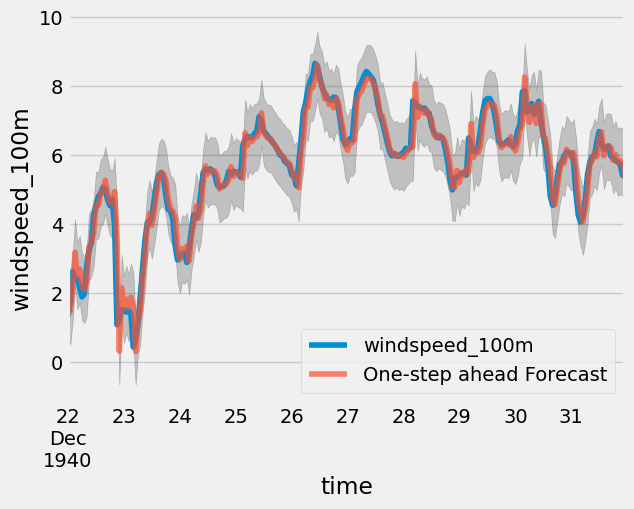

In [15]:
ax = df1['1940-12-22 00:00:00':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('time')
ax.set_ylabel('windspeed_100m')
plt.legend()
plt.show()

In [16]:
# Calculate the Mean Squared Error (MSE) between observed and predicted values
mse = ((y_truth['windspeed_100m'] - y_truth['Pred_Wind_Speed']) ** 2).mean()
# Print the calculated Mean Squared Error
print('Mean Squared Error = ', round(mse, 2))

Mean Squared Error =  0.13


In [17]:
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error = ',rmse)

Root Mean Squared Error =  0.360070460453851


1. **Future Forecast:**
   - Obtains a forecast for future time steps (240 steps in this case) using the fitted SARIMAX model (`results`).

2. **Confidence Interval Calculation:**
   - Computes the confidence intervals (`pred_ci`) associated with the forecasted values. These intervals represent the range within which future values are expected to fall.

In [18]:
pred_uc = results.get_forecast(steps=240)
pred_ci = pred_uc.conf_int()

1. **DataFrame Creation:**
   - Creates a DataFrame (`future_df`) to store the predicted mean values for future time steps using the `predicted_mean` attribute of the forecast (`pred_uc`).

2. **Column Renaming:**
   - Renames the column of the DataFrame to 'Future_pred'.

3. **Display DataFrame:**
   - Displays the DataFrame (`future_df`) containing the predicted mean values for future time steps.

In [19]:
future_df = pd.DataFrame(pred_uc.predicted_mean)
future_df.columns = ['Future_pred']
future_df

,Future_pred
1941-01-01 00:00:00,5.478305
1941-01-01 01:00:00,5.462665
1941-01-01 02:00:00,5.360057
1941-01-01 03:00:00,5.414178
1941-01-01 04:00:00,5.564624
...,...
1941-01-10 19:00:00,5.943189
1941-01-10 20:00:00,5.967736
1941-01-10 21:00:00,5.981825
1941-01-10 22:00:00,6.026198


In [20]:
future_df['Future_pred'].median()

5.920003433549061

1. **Plot Observed Values:**
   - Plots the observed wind speed values from the original DataFrame (`df1`).

2. **Overlay Forecast:**
   - Overlays the predicted mean values (`pred_uc.predicted_mean`) for the last 240 time steps on the plot.

3. **Shaded Confidence Intervals:**
   - Fills the area between the lower and upper bounds of the confidence intervals with a shaded color for the last 240 time steps.

4. **Set Axis Labels:**
   - Sets the x-axis label to 'time' and the y-axis label to 'windspeed_100m'.

5. **Add Legend:**
   - Adds a legend to the plot for better interpretation.

6. **Display Plot:**
   - Displays the final plot showing observed values, forecast, and confidence intervals for the last 240 time steps.

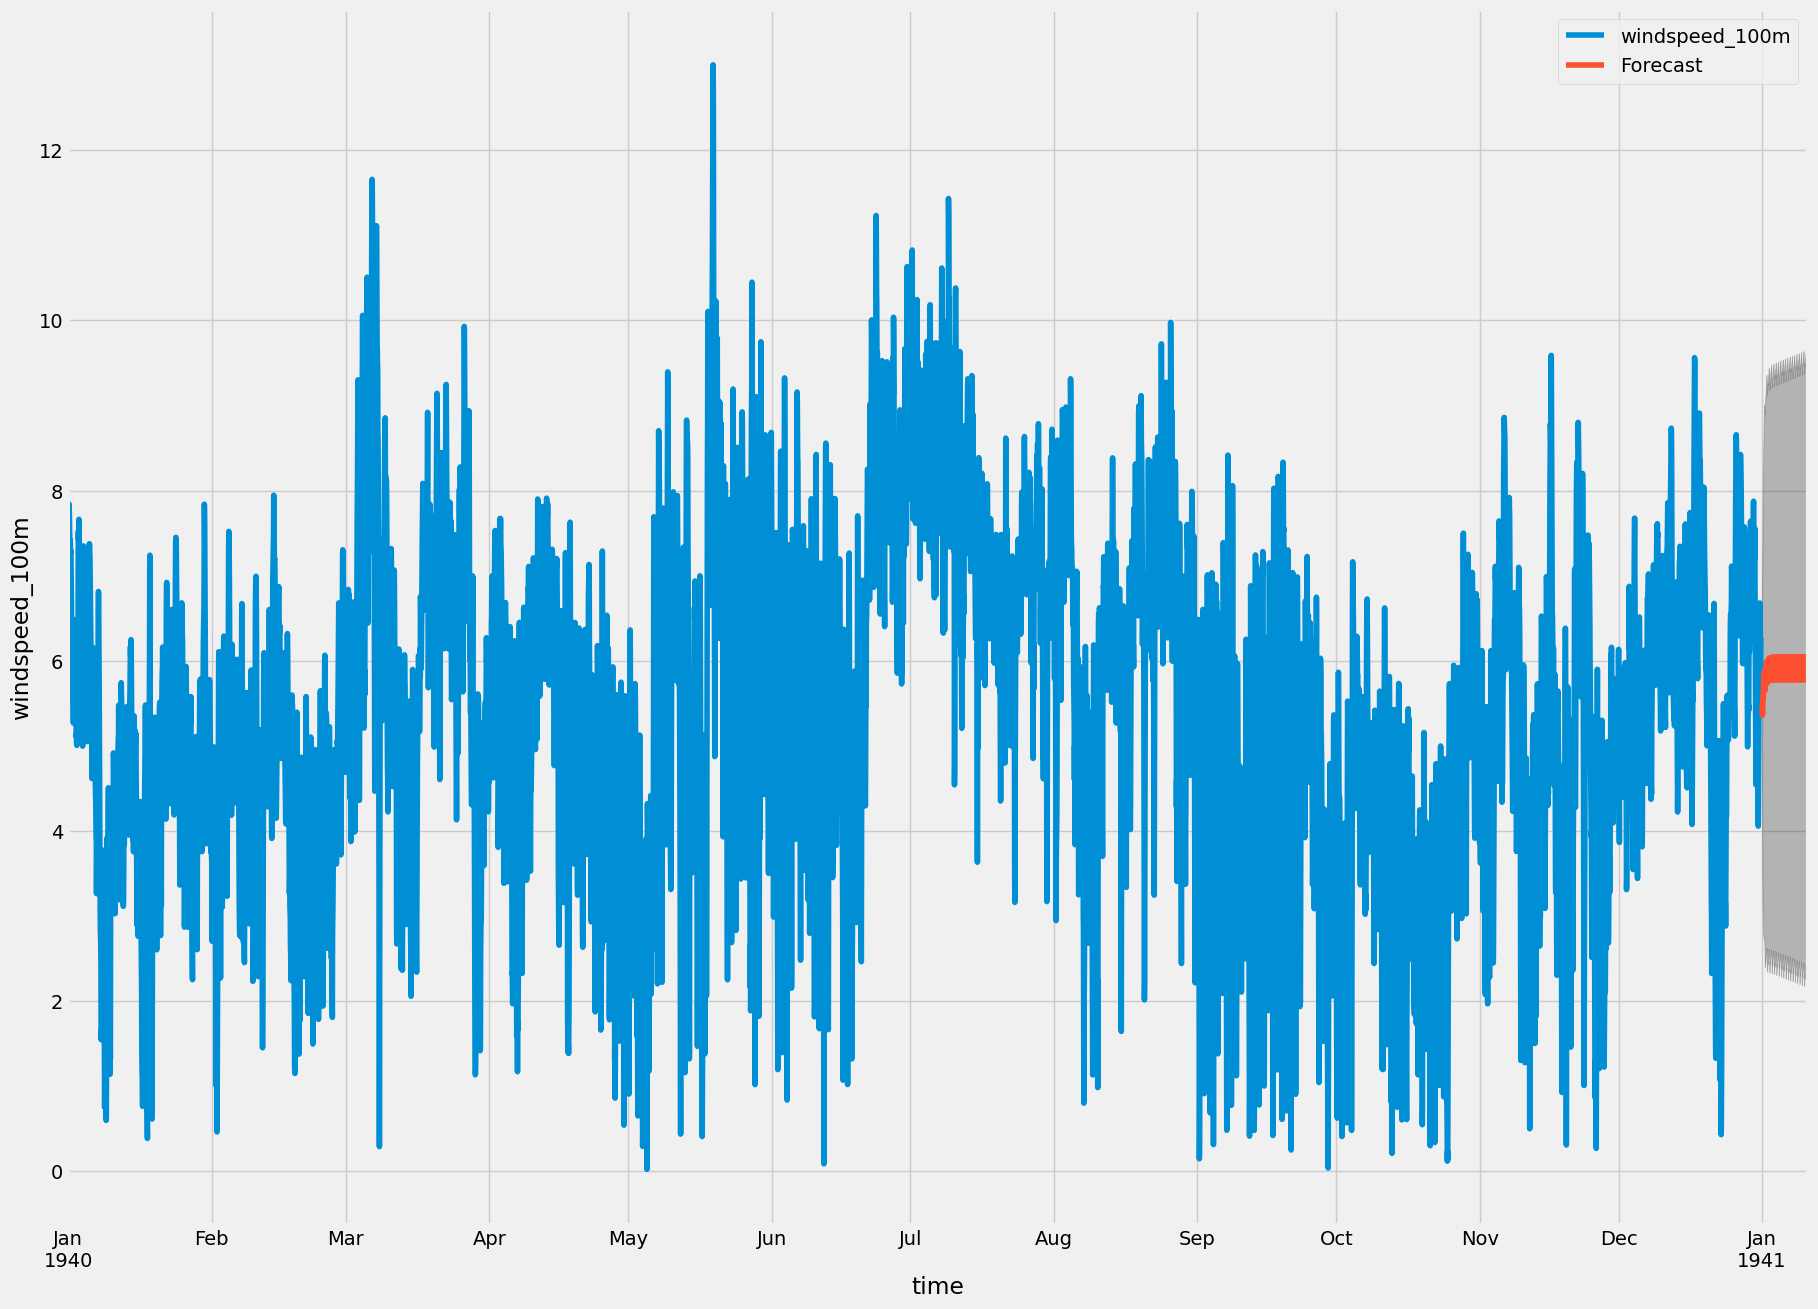

In [21]:
ax = df1[:].plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean[-240:].plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index[-240:], pred_ci.iloc[-240:, 0], pred_ci.iloc[-240:, 1], color='k', alpha=.25)
ax.set_xlabel('time')
ax.set_ylabel('windspeed_100m')
plt.legend()
plt.show()

In [22]:
df1.tail()

,windspeed_100m
time,
1940-12-31 19:00:00,5.833174
1940-12-31 20:00:00,5.794057
1940-12-31 21:00:00,5.743182
1940-12-31 22:00:00,5.412560
1940-12-31 23:00:00,5.432285


In [23]:
import pickle
import statsmodels.api as sm

# Assuming you have already trained your SARIMAX model and stored it in `results`

# Specify the directory path
directory_path = r'D:\NIWE\\'

# Save the model in the specified directory
with open(directory_path + 'sarimax_model.pkl', 'wb') as model_file:
    pickle.dump(results, model_file)

In [24]:
import pickle

# Load the model
with open('sarimax_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Print the loaded model object
print(model)
